# Explore data augmentations  
This notebook will be used to test different data augmentation strategies.

## basic imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

## Utility functions

In [2]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()
    
def display_batch(batch):
        # get images, bboxes and classes
        batched_images = batch[0]['image'].numpy()
        batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
        batched_classes = batch[1]['groundtruth_classes'].numpy()
        num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
        batch_size = batched_images.shape[0]
        for idx in range(batch_size):
            display_instances(batched_images[idx, ...], 
                              batched_bboxes[idx, :num_bboxes[idx], :],
                              batched_classes[idx, ...])

## Displaying Refrence Samples

In [3]:
from utils import get_train_input

In [4]:
train_dataset = get_train_input("./experiments/reference/pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['./data/train/segment-10724020115992582208_7660_400_7680_400_with_camera_labels.tfrecord', './data/train/segment-11113047206980595400_2560_000_2580_000_with_camera_labels.tfrecord', './data/train/segment-11566385337103696871_5740_000_5760_000_with_camera_labels.tfrecord', './data/train/segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord', './data/train/segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord', './data/train/segment-11847506886204460250_1640_000_1660_000_with_camera_labels.tfrecord', './data/train/segment-11489533038039664633_4820_000_4840_000_with_camera_labels.tfrecord', './data/train/segment-10517728057304349900_3360_000_3380_000_with_camera_labels.tfrecord', './data/train/segment-11623618970700582562_2840_367_2860_367_with_camera_labels.tfrecord', './data/train/segment-10526338824408452410_5714_660_5734_660_with_camera_labels.tfrecord', './data/train/segment-11004685739714500220_230

INFO:tensorflow:Number of filenames to read: 67
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.


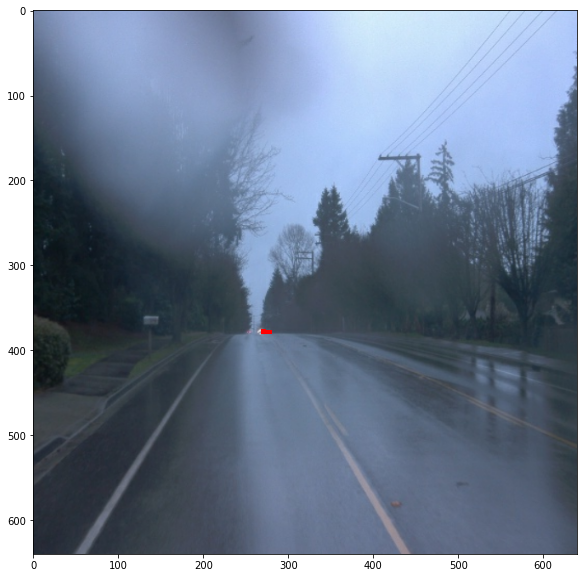

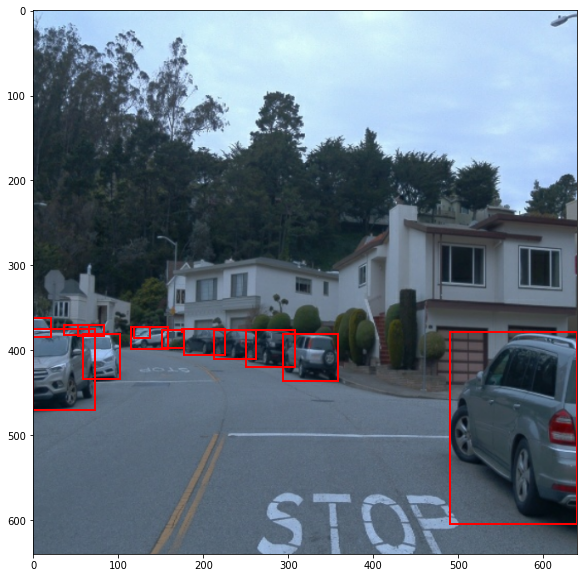

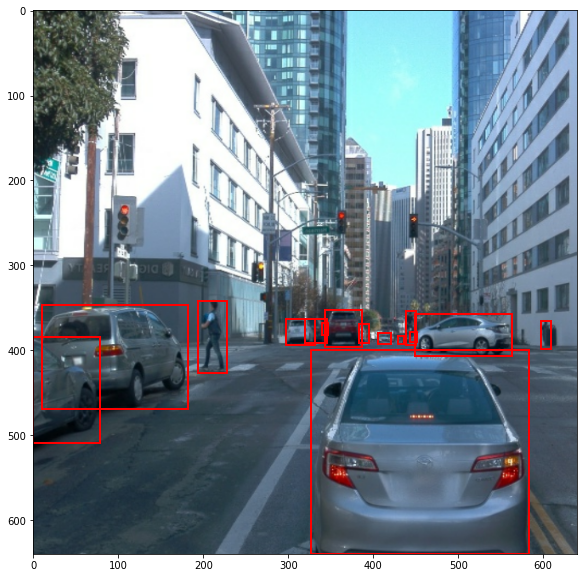

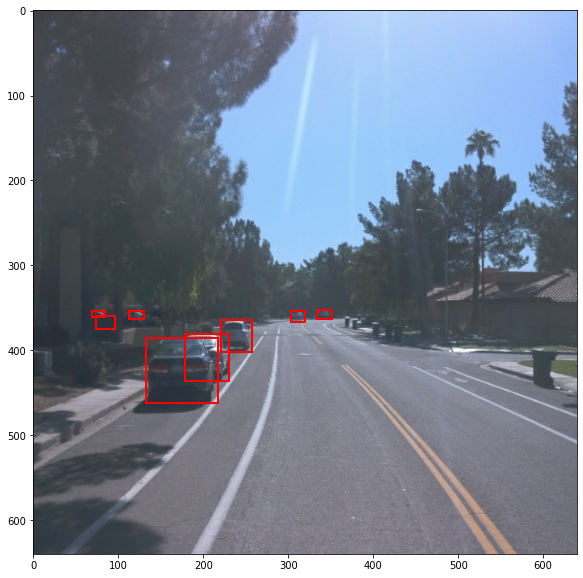

In [5]:
%matplotlib inline

for batch in train_dataset.take(1):
        display_batch(batch)

## Displaying Augmented Samples

In [13]:
augmented_dataset = get_train_input("./experiments/augmentation/pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['./data/train/segment-10724020115992582208_7660_400_7680_400_with_camera_labels.tfrecord', './data/train/segment-11113047206980595400_2560_000_2580_000_with_camera_labels.tfrecord', './data/train/segment-11566385337103696871_5740_000_5760_000_with_camera_labels.tfrecord', './data/train/segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord', './data/train/segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord', './data/train/segment-11847506886204460250_1640_000_1660_000_with_camera_labels.tfrecord', './data/train/segment-11489533038039664633_4820_000_4840_000_with_camera_labels.tfrecord', './data/train/segment-10517728057304349900_3360_000_3380_000_with_camera_labels.tfrecord', './data/train/segment-11623618970700582562_2840_367_2860_367_with_camera_labels.tfrecord', './data/train/segment-10526338824408452410_5714_660_5734_660_with_camera_labels.tfrecord', './data/train/segment-11004685739714500220_230

INFO:tensorflow:Number of filenames to read: 67


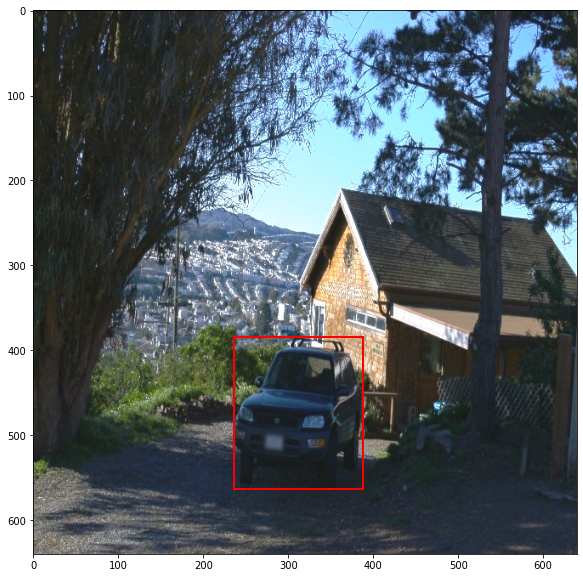

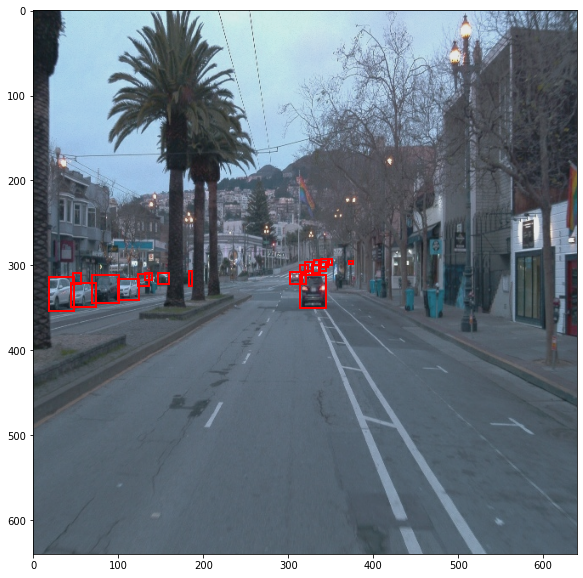

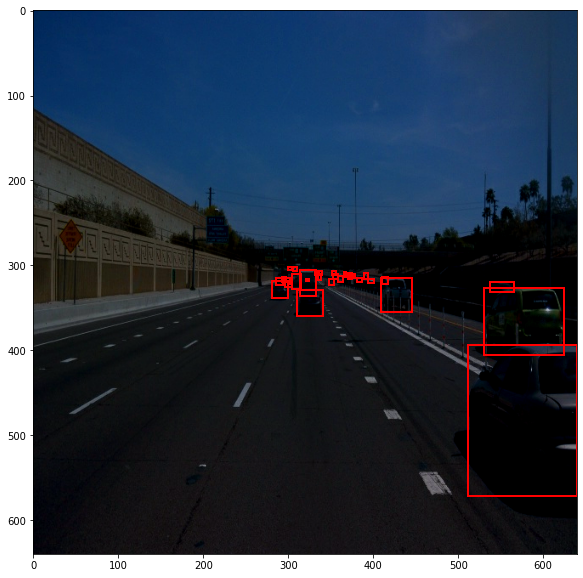

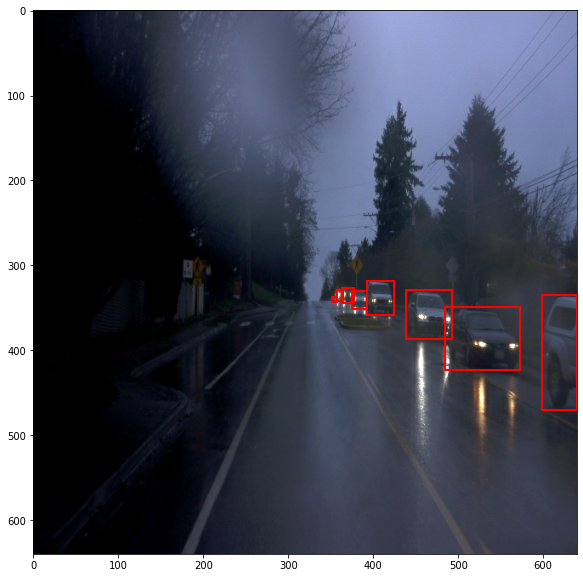

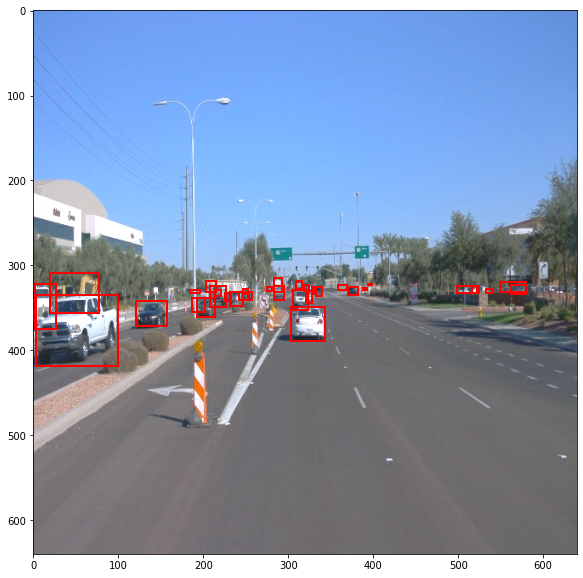

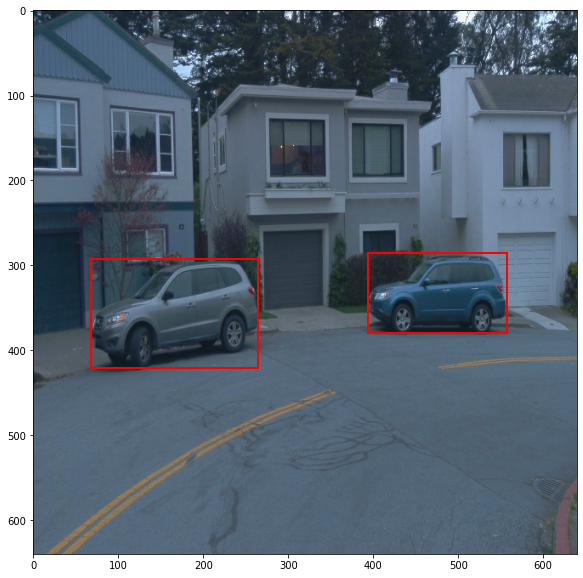

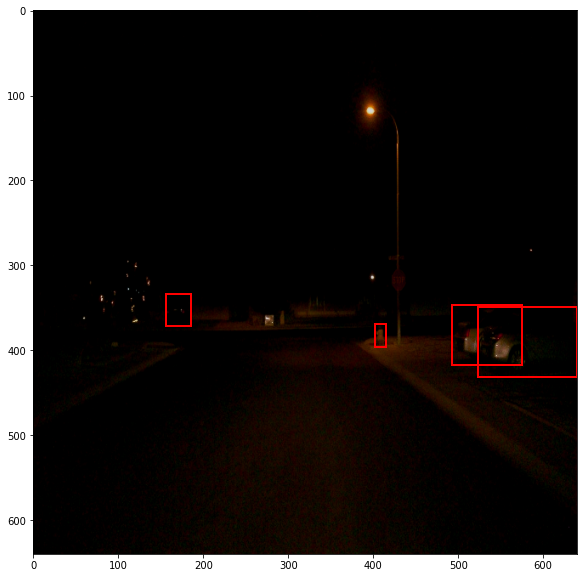

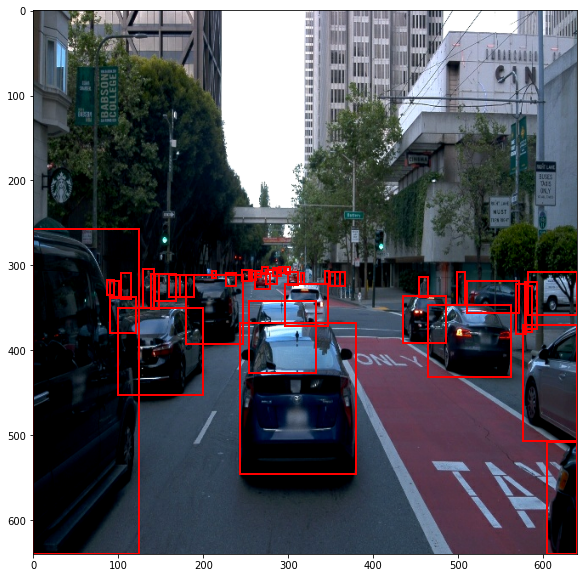

In [14]:
%matplotlib inline

for batch in augmented_dataset.take(2):
        display_batch(batch)